In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
sns.set_context('notebook')
sns.set_style('whitegrid')
style.use('dark_background')

In [16]:
df = pd.read_csv('Weird Data.csv', index_col=0)

In [17]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


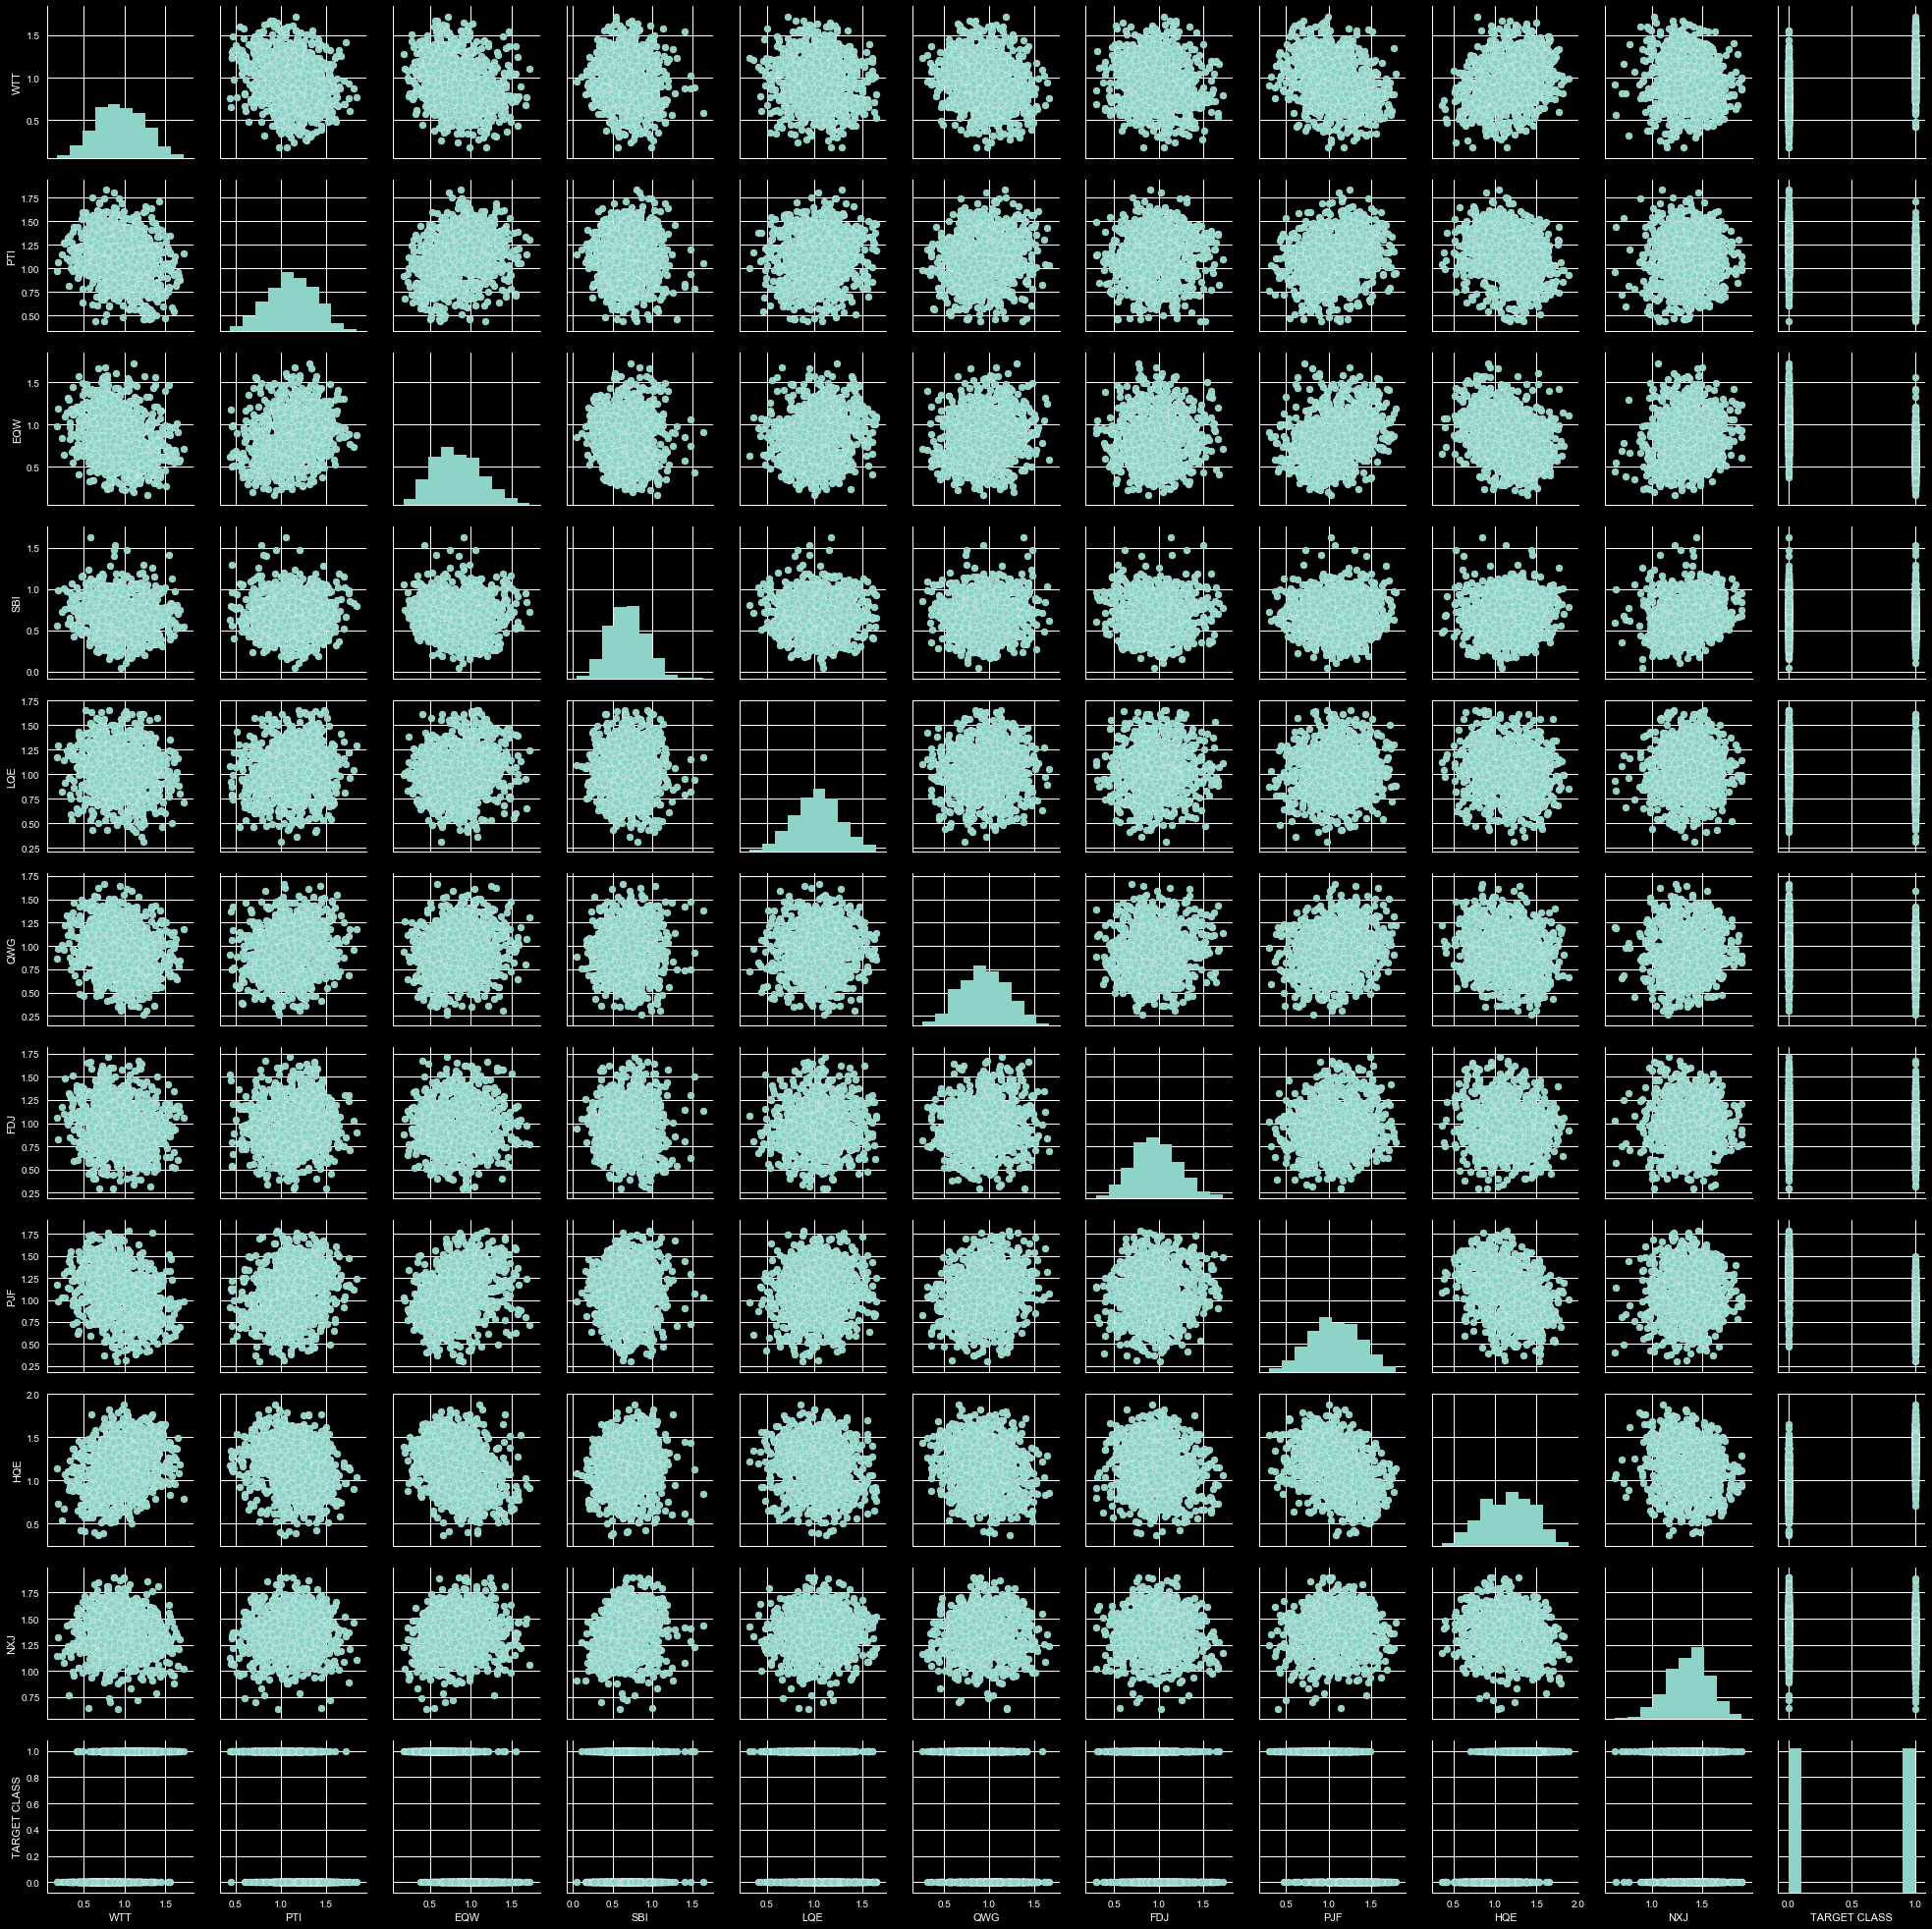

In [19]:
sns.pairplot(df)

In [20]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


__Scaling all features to Normal__

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

__Train Test Split__

In [24]:
from sklearn.model_selection import train_test_split

scaler.transform will return numpy array

In [25]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

we trun this numpy array to pandas dataframe

In [26]:
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['TARGET CLASS']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

__K Nearest Neighbors__

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
predictions = knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       116
          1       0.94      0.95      0.94       134

avg / total       0.94      0.94      0.94       250



__Finding the best vlaue of K__

In [34]:
error_rate = []
for i in range(1,100):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

__Visualizing the result__

Text(0,0.5,'Error Rate')

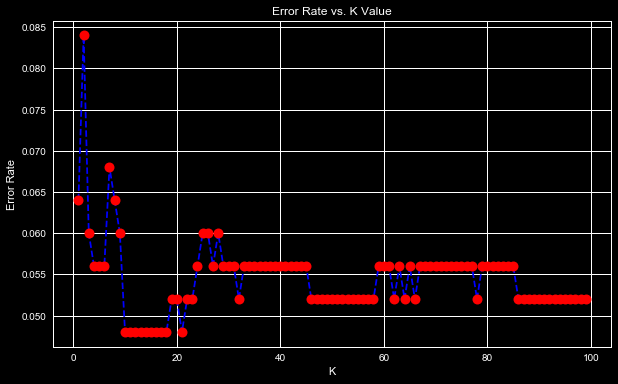

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can also do grid search on _hyperparameters_

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {'n_neighbors': list(range(1,101)) , 
          'p':[1, 2], 
          'weights':['uniform', 'distance']}

In [38]:
knngcv = GridSearchCV(KNeighborsClassifier(), 
                      param_grid=params, 
                      scoring='f1', 
                      cv=4)

In [39]:
knngcv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [40]:
knngcv.best_params_

{'n_neighbors': 23, 'p': 1, 'weights': 'distance'}

In [41]:
knngcv.best_score_

0.9452087140929246

In [42]:
print(classification_report(y_test, knngcv.best_estimator_.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94       116
          1       0.95      0.95      0.95       134

avg / total       0.95      0.95      0.95       250



__Comparing the results to Logistic Regression__

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lrgcv = GridSearchCV(LogisticRegression(), 
             param_grid={'C':[1,10,100], 
                         'penalty':['l1','l2']}, 
             scoring='f1',
             cv=4,
             verbose=1)

In [81]:
lrgcv.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [82]:
lrgcv.best_params_

{'C': 1, 'penalty': 'l2'}

In [83]:
lrgcv.best_score_

0.9427546017672875

In [86]:
print(classification_report(y_test, lrgcv.best_estimator_.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94       116
          1       0.95      0.95      0.95       134

avg / total       0.95      0.95      0.95       250

